<a href="https://colab.research.google.com/github/sandhya-exe/counting-the-no-of-trees/blob/main/TreeCount_Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tree Detection

**Importing Libraries**
- cv2: OpenCV library used for image processing.
- numpy (np): Library for handling arrays and mathematical functions.
- KMeans: A clustering algorithm from scikit-learn used to classify objects in the image.


In [31]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

Part 2: Reading and Preprocessing the **Image**

cv2.imread: Reads the image from the specified path

In [32]:
image = cv2.imread('/content/tree2.png')

- cv2.resize: Resizes the image to 800x600 pixels to make further processing faster.
- cv2.normalize: Normalizes the image to improve contrast by adjusting pixel values between 0 and 255.

In [33]:
resized_image = cv2.resize(image, (800, 600))  # Resize for faster processing
normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX)


**Part 3: Converting to Grayscale and Detecting Edges**

- cv2.cvtColor: Converts the image from BGR (color) to grayscale.
- cv2.Canny: Applies the Canny edge detection algorithm to find edges in the grayscale image.

In [34]:
gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)


In [35]:
edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)


**Part 4: Clustering (Tree Species Classification)**

- KMeans: The KMeans algorithm is used to classify the detected edges into 3 clusters, assuming there are 3 different tree species.
- reshape: Reshapes the edges array to a suitable format for KMeans.
- fit_predict: Fits the model and predicts cluster labels.

In [36]:
kmeans = KMeans(n_clusters=3)  # Assuming 3 tree species
tree_species_labels = kmeans.fit_predict(edges.reshape(-1, 1))
tree_species_labels = tree_species_labels.reshape(edges.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [37]:
unique_labels, counts = np.unique(tree_species_labels, return_counts=True)


Display the **results**

**Part 5: Displaying Results**

matplotlib.pyplot: A library for plotting images and graphs.

In [38]:
import matplotlib.pyplot as plt

- plt.figure: Creates a figure for displaying images.
- plt.subplot: Creates subplots to display multiple images side by side.
- plt.imshow: Displays the images.
- plt.title: Adds a title to each subplot.

Text(0.5, 1.0, 'Original Image')

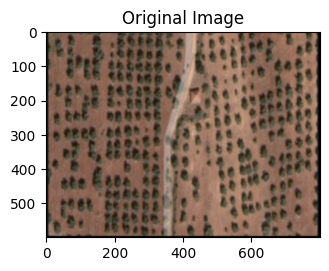

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(resized_image)
plt.title('Original Image')

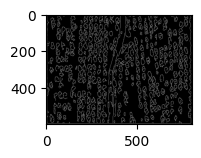

In [40]:
plt.subplot(132)
plt.imshow(edges, cmap='gray')


Text(0.5, 1.0, 'Edge Detection')

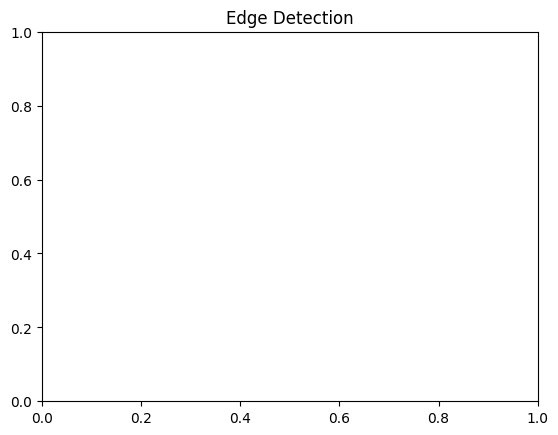

In [41]:
plt.title('Edge Detection')

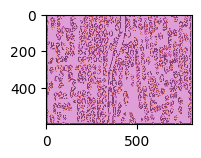

In [42]:
plt.subplot(133)
plt.imshow(tree_species_labels, cmap='tab20b')

Text(0.5, 1.0, 'Tree Species Clustering')

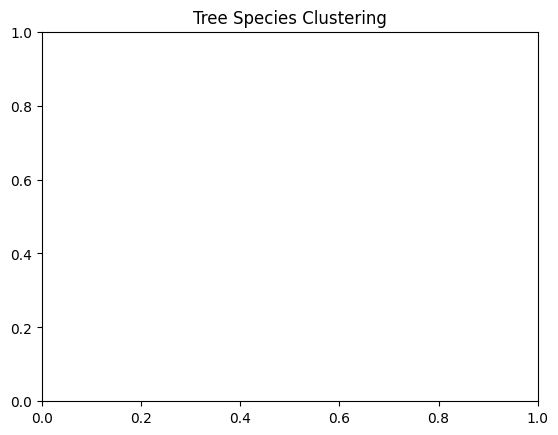

In [43]:
plt.title('Tree Species Clustering')


In [44]:
plt.show()

 Print the tree counts by species

np.unique: Finds unique cluster labels and counts the number of pixels in each cluster.

print: Outputs the number of trees for each detected species.

In [45]:
unique_labels, counts = np.unique(tree_species_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f'Tree Species {label}: {count} trees')

Tree Species 1: 39804 trees
Tree Species 2: 440196 trees


# Step2;- ***harsh***

# **Part 7: Detecting Trees in Another Image**

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [50]:
image = cv2.imread('/content/tree4.jpeg')
# using second image

In [51]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

GaussianBlur: Blurs the image to reduce noise before edge detection.

In [52]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [53]:
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)


cv2.findContours: Finds contours (i.e., boundaries of detected objects) in the edge-detected image.

In [54]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


min_area: Filters out small contours, keeping only those larger than 200 pixels

In [55]:
min_area = 200  # Adjust this threshold based on your image
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]


**Part 8: Drawing Circles Around Detected Trees**

- cv2.minEnclosingCircle: Finds the smallest circle that can enclose each contour.
- cv2.circle: Draws a circle around the detected trees.
- cv2.putText: Adds text on the image showing the total number of detected trees.
- cv2_imshow: Displays the final image with circles and text.
- cv2.waitKey and cv2.destroyAllWindows: Handle the display window and wait for a key press to close it.

In [56]:
for contour in filtered_contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image, center, radius, (0, 255, 0), 2)

In [57]:
num_trees = len(filtered_contours)

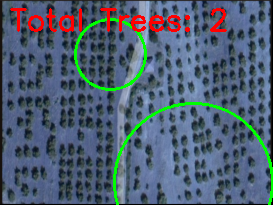

In [58]:
cv2.putText(image, f'Total Trees: {num_trees}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
print(f'Total Trees: {num_trees}')


Total Trees: 2


Accuracy score = very low

its a prototype.....
for more accuracy, we will going to use algorithm. So, please use out next file Tree_detections2